In [18]:
import netCDF4 as nc
import xarray as xr
from geoarray import GeoArray
from spectral.io import envi
import matplotlib.pyplot as plt
import numpy as np
from isofit.core.common import resample_spectrum
import os
import isofit
from isofit.core.sunposition import sunpos
import holoviews as hv
import hvplot.xarray
from datetime import datetime

import sklearn
import pandas as pd
#import tkinter
#import matplotlib
#matplotlib.use('TkAgg')

#%matplotlib inline

In [2]:
# order: west africa, gobi desert, west india, north africa, arabian desert
obs_paths = ['../emit_obs_loc/emit20230321t150833_o08010_s000_l1b_obs_b0106_v01.hdr', 
             '../gobi_desert_scene/EMIT_L1B_OBS_001_20230603T080502_2315406_055_obs.hdr', 
            '../west_india_scene/EMIT_L1B_OBS_001_20230217T094600_2304806_029_obs.hdr', 
            '../north_africa_scene/EMIT_L1B_OBS_001_20230214T133958_2304509_008_obs.hdr',
            '../arabian_desert_scene/EMIT_L1B_OBS_001_20230424T091202_2311406_031_obs.hdr']
rad_paths = ['../west_africa_scene/wa_unortho/EMIT_L1B_RAD_001_20230321T150833_2308010_003_radiance.hdr', 
             '../gobi_desert_scene/EMIT_L1B_RAD_001_20230603T080502_2315406_055_radiance.hdr', 
            '../west_india_scene/EMIT_L1B_RAD_001_20230217T094600_2304806_029_radiance.hdr', 
            '../north_africa_scene/EMIT_L1B_RAD_001_20230214T133958_2304509_008_radiance.hdr',
            '../arabian_desert_scene/EMIT_L1B_RAD_001_20230424T091202_2311406_031_radiance.hdr']
mask_paths = ['../west_africa_scene/wa_unortho/EMIT_L2A_MASK_001_20230321T150833_2308010_003_mask.hdr', 
             '../gobi_desert_scene/EMIT_L2A_MASK_001_20230603T080502_2315406_055_mask.hdr', 
            '../west_india_scene/EMIT_L2A_MASK_001_20230217T094600_2304806_029_mask.hdr',  
            '../north_africa_scene/EMIT_L2A_MASK_001_20230214T133958_2304509_008_mask.hdr',
            '../arabian_desert_scene/EMIT_L2A_MASK_001_20230424T091202_2311406_031_mask.hdr']

paths = []
paths.append(obs_paths)
paths.append(rad_paths)
paths.append(mask_paths)


irr_file = os.path.join(os.path.dirname(isofit.__file__), "..", "data", "kurudz_0.1nm.dat")

In [3]:
west_africa_paths = []
gobi_desert_paths = []
west_india_paths = []
north_africa_paths = []
arabian_desert_paths = []

scene_paths = []
scene_paths.append(west_africa_paths)
scene_paths.append(gobi_desert_paths)
scene_paths.append(west_india_paths)
scene_paths.append(north_africa_paths)
scene_paths.append(arabian_desert_paths)


for i in range(5):
    for j in range(3):
        scene_paths[i].append(paths[j][i])    

In [4]:
scene_paths

[['../emit_obs_loc/emit20230321t150833_o08010_s000_l1b_obs_b0106_v01.hdr',
  '../west_africa_scene/wa_unortho/EMIT_L1B_RAD_001_20230321T150833_2308010_003_radiance.hdr',
  '../west_africa_scene/wa_unortho/EMIT_L2A_MASK_001_20230321T150833_2308010_003_mask.hdr'],
 ['../gobi_desert_scene/EMIT_L1B_OBS_001_20230603T080502_2315406_055_obs.hdr',
  '../gobi_desert_scene/EMIT_L1B_RAD_001_20230603T080502_2315406_055_radiance.hdr',
  '../gobi_desert_scene/EMIT_L2A_MASK_001_20230603T080502_2315406_055_mask.hdr'],
 ['../west_india_scene/EMIT_L1B_OBS_001_20230217T094600_2304806_029_obs.hdr',
  '../west_india_scene/EMIT_L1B_RAD_001_20230217T094600_2304806_029_radiance.hdr',
  '../west_india_scene/EMIT_L2A_MASK_001_20230217T094600_2304806_029_mask.hdr'],
 ['../north_africa_scene/EMIT_L1B_OBS_001_20230214T133958_2304509_008_obs.hdr',
  '../north_africa_scene/EMIT_L1B_RAD_001_20230214T133958_2304509_008_radiance.hdr',
  '../north_africa_scene/EMIT_L2A_MASK_001_20230214T133958_2304509_008_mask.hdr'],
 [

In [5]:
import preprocess
import time

TOA_refls = []
water_vapor_vals = []

start_time = time.time()
for i in range(5):
    print('scene: ', i)
    TOA_refls.append(preprocess.main(scene_paths[i], irr_file))
    water_vapor_vals.append(preprocess.get_water_vapor(scene_paths[i]))

end_time = time.time()
elapsed = end_time - start_time
print('Executed in: ', elapsed, ' seconds')
    

scene:  0


C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


scene:  1
scene:  2
scene:  3
scene:  4
Executed in:  48.84274077415466  seconds


In [6]:
print(len(TOA_refls))
print(len(water_vapor_vals))

5
5


In [7]:
print(TOA_refls[0].shape)
print(TOA_refls[1].shape)
print(TOA_refls[2].shape)
print(TOA_refls[3].shape)
print(TOA_refls[4].shape)
print(water_vapor_vals[0].shape)
print(water_vapor_vals[1].shape)
print(water_vapor_vals[2].shape)
print(water_vapor_vals[3].shape)
print(water_vapor_vals[4].shape)

(1280, 1242, 285)
(1280, 1242, 285)
(1376, 1242, 285)
(1280, 1242, 285)
(1280, 1242, 285)
(1280, 1242)
(1280, 1242)
(1376, 1242)
(1280, 1242)
(1280, 1242)


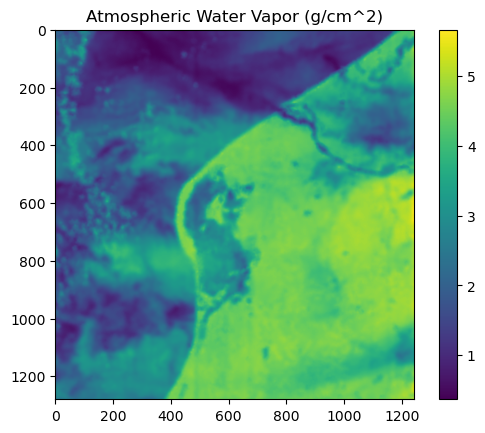

In [9]:
import disp_h2o_data

disp_h2o_data.plot_h2o_map(water_vapor_vals[0])

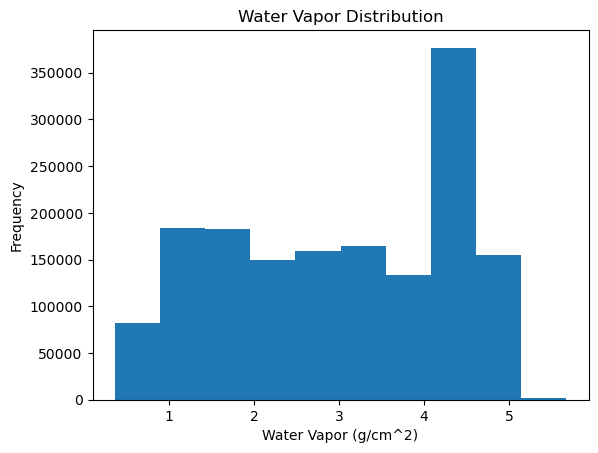

In [10]:
disp_h2o_data.plot_h2o_hist(water_vapor_vals[0])

C:\Users\vpatro\Desktop\EMIT\disp_h2o_data.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vpatro\Desktop\EMIT\disp_h2o_data.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


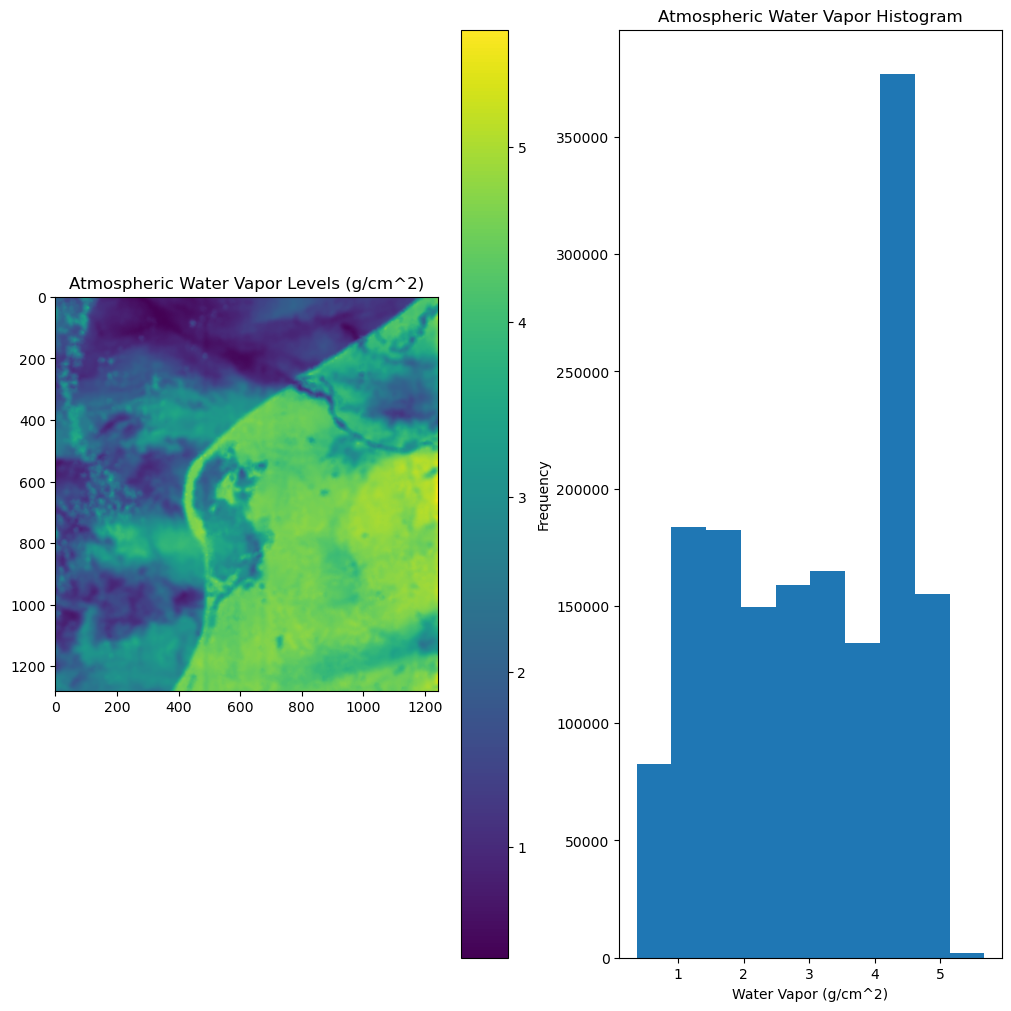

In [11]:
disp_h2o_data.plot_h2o_both(water_vapor_vals[0])

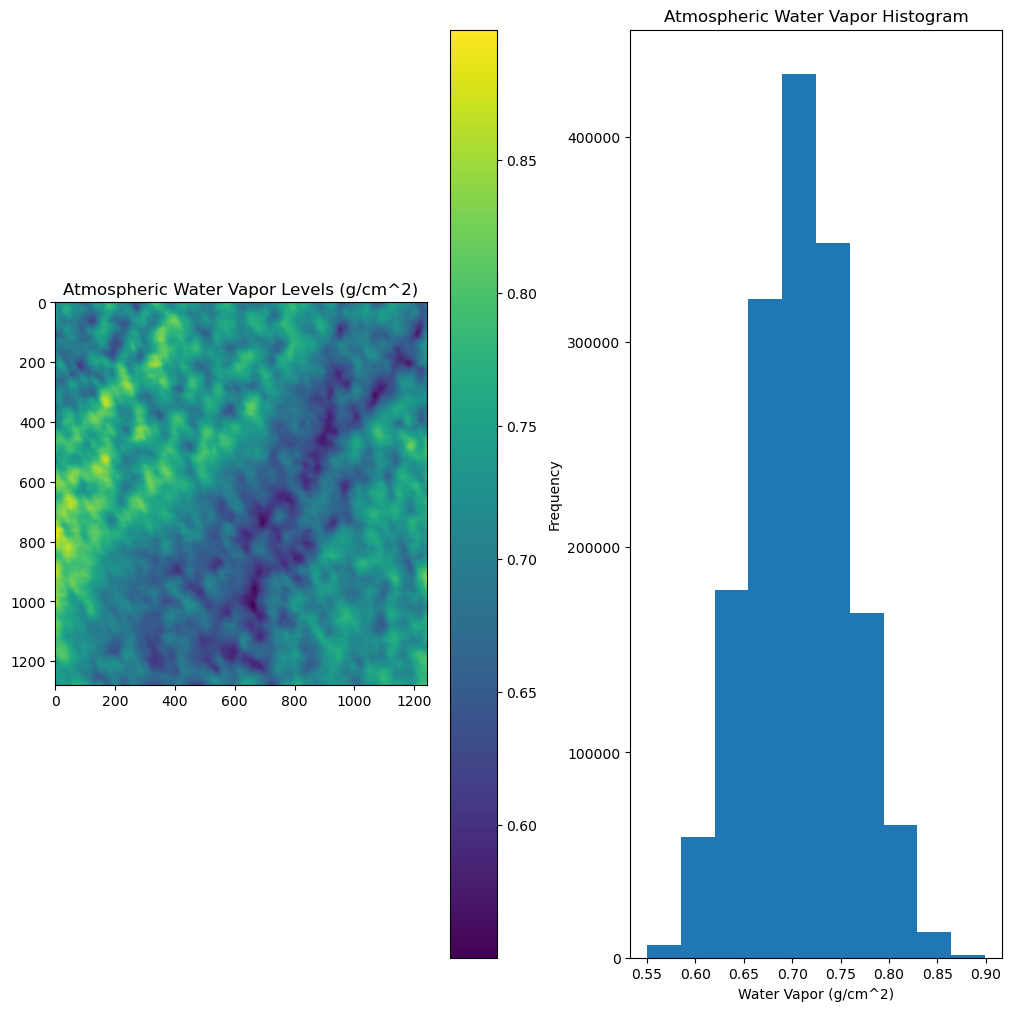

In [13]:
disp_h2o_data.plot_h2o_both(water_vapor_vals[1])

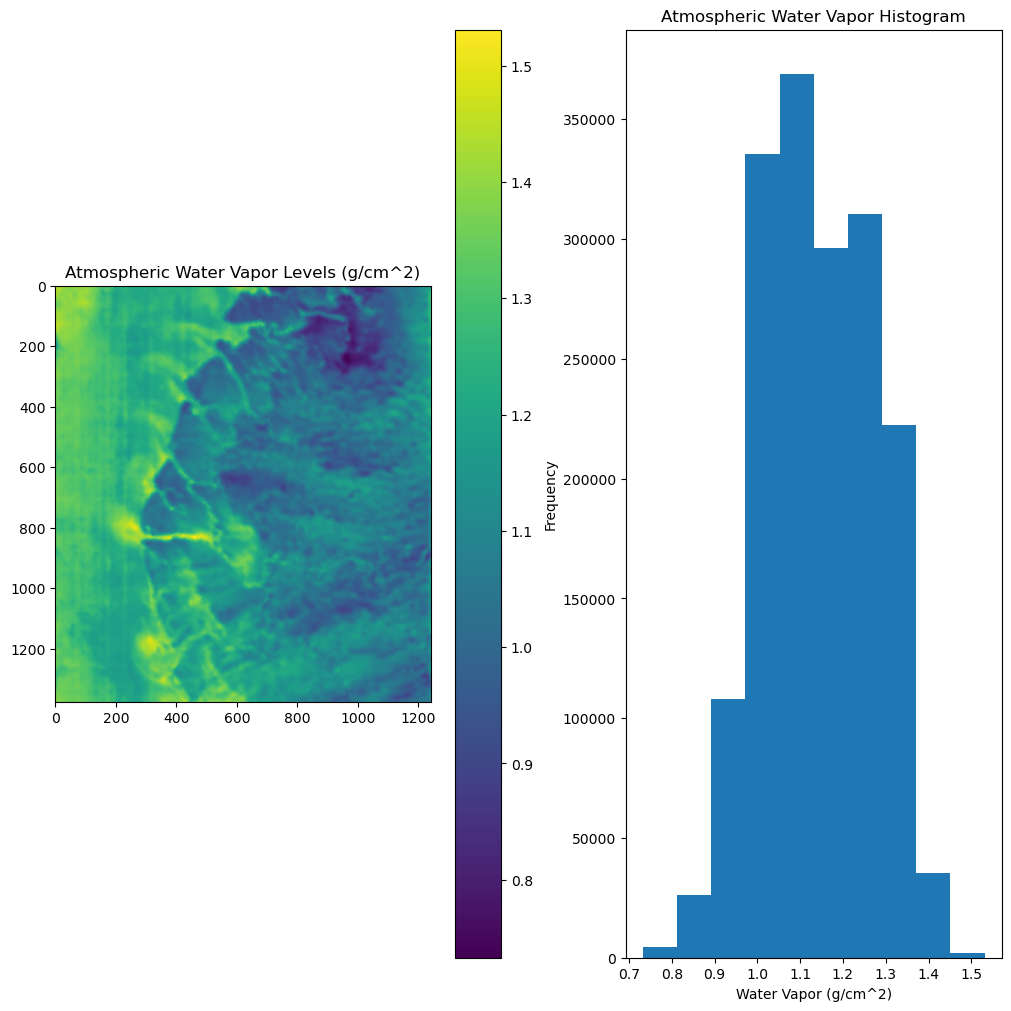

In [14]:
disp_h2o_data.plot_h2o_both(water_vapor_vals[2])

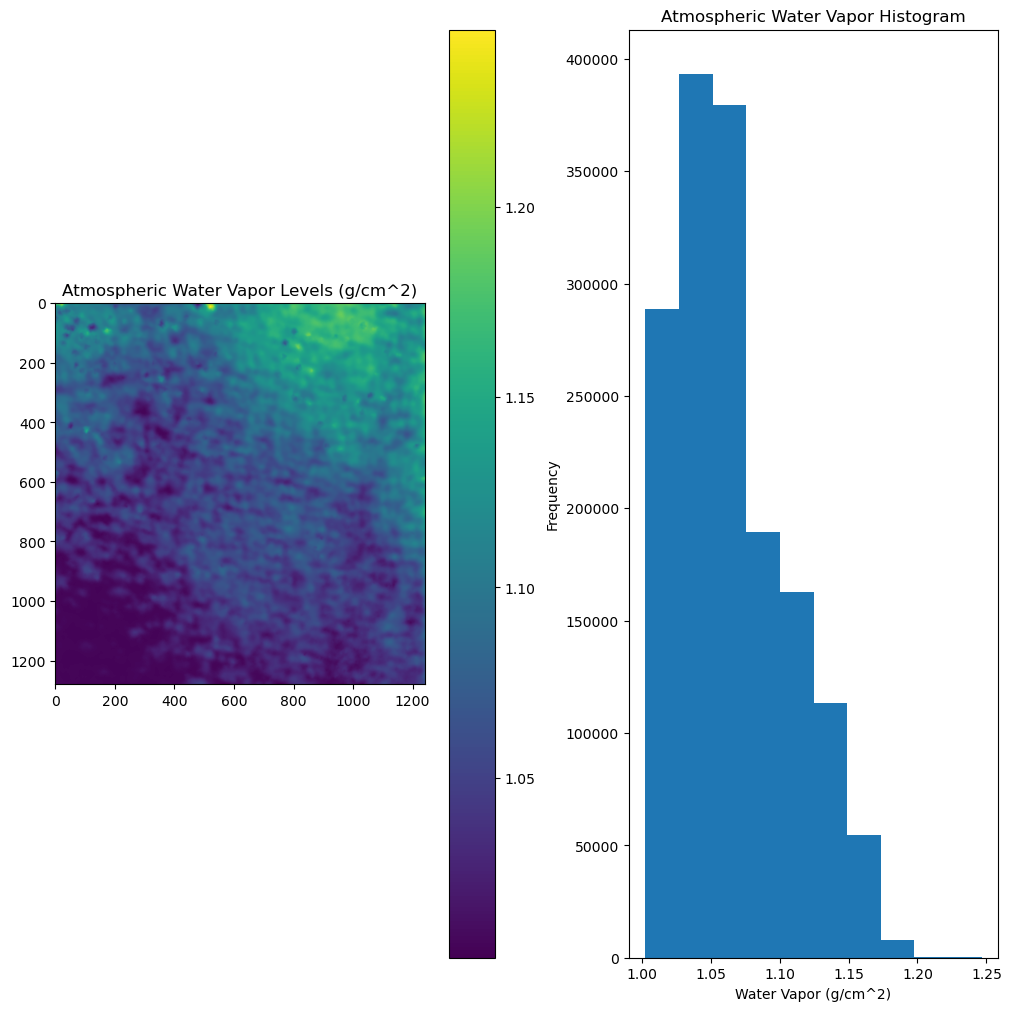

In [15]:
disp_h2o_data.plot_h2o_both(water_vapor_vals[3])

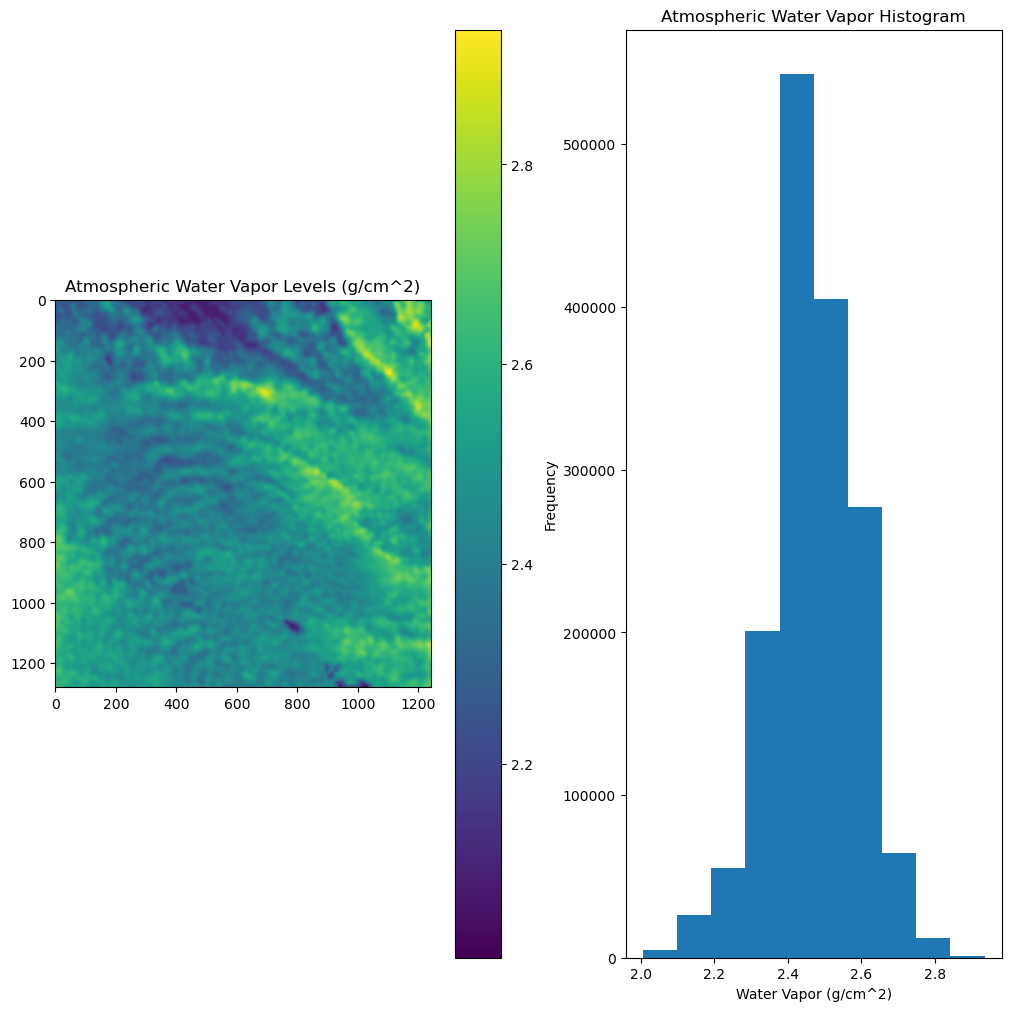

In [16]:
disp_h2o_data.plot_h2o_both(water_vapor_vals[4])

In [22]:
df = pd.DataFrame(TOA_refls[0].reshape((1280*1242, 285)))

In [26]:
df1 = pd.DataFrame(TOA_refls[1].reshape((1280*1242, 285)))
df2 = pd.DataFrame(TOA_refls[2].reshape((1376*1242, 285)))
df3 = pd.DataFrame(TOA_refls[3].reshape((1280*1242, 285)))
df4 = pd.DataFrame(TOA_refls[4].reshape((1280*1242, 285)))

In [28]:
df = pd.concat([df, df1, df2, df3, df4], ignore_index = True)

MemoryError: Unable to allocate 8.57 GiB for an array with shape (285, 8068032) and data type float32